Back to the [Random Forest+ Notebook](./random-forest-ramp_exploit.ipynb)

Back to the [ML Notebook](./ml.ipynb)

To the [README](./README.md)

--------------------------------------------------------------------------------

# Support Vector Machine

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVR
from sklearn.metrics import root_mean_squared_error

# set the theme for seaborn graphics
sns.set_theme(context='paper', style='whitegrid')

In [2]:
# load the training and testing data
df_train = [
    pd.read_csv(f'data/df_train_{loc}.csv', index_col=0)
    for loc in range(1, 5)
]
df_test = [
    pd.read_csv(f'data/df_test_{loc}.csv', index_col=0)
    for loc in range(1, 5)
]

In [3]:
# define target and features
X_train = [
    frame.drop('Power', axis=1)
    for frame in df_train
]
y_train = [
    frame.Power
    for frame in df_train
]

X_test = [
    frame.drop('Power', axis=1)
    for frame in df_test
]
y_true = [
    frame.Power
    for frame in df_test
]

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
param_grid = {
    'C': [.1 + n*.1 for n in range(20)],
}

base_estimator = LinearSVR(
    loss='squared_epsilon_insensitive',     # l2 loss
    epsilon=1.e-3,
    random_state=404
)

# instantiate Logistic Regression model
support_vector_regressor = [
    GridSearchCV(
        estimator=base_estimator,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ) for _ in range(4)
]

In [6]:
# train the model
_ = [model.fit(X, y) for (model, X, y) in zip(support_vector_regressor, X_train, y_train)]

In [7]:
# make predictions
y_pred = [
    model.predict(X)
    for (model, X) in zip(support_vector_regressor, X_test)
]

In [8]:
# evaluate the results
for idx, (y_t, y_p) in enumerate(zip(y_true, y_pred)):
    print(f'Location {idx+1}:\tRMSE = {root_mean_squared_error(y_t, y_p):.3f}')

Location 1:	RMSE = 0.178
Location 2:	RMSE = 0.162
Location 3:	RMSE = 0.213
Location 4:	RMSE = 0.131


Compare that to our original Random Forest results:

    Location 1:	RMSE = 0.130
    Location 2:	RMSE = 0.090
    Location 3:	RMSE = 0.106
    Location 4:	RMSE = 0.095

SVM is having a harder time understanding the dataset than Random Forest does.
Aside from the complexity of the data itself this is also related to the concrete
choice of our SVM model: we chose `LinearSVR` instead of `SVR` with a different
kernel, because it is suggested to do so for larger datasets (with more than
a few tenthousand observations; ours have around three times as many).

After having seen what Random Forest was able to do with the slightly modified
dataset, however, we expect SVM to show greater improvements by getting to
learn on that as well instead of switching to a different model.
(See the [Suppoert Vector Machine+ Notebood](./support-vector-machine-ramp_exploit.ipynb)
for that.)

For completion, let's also visualize the predictions compared to the actual
values:

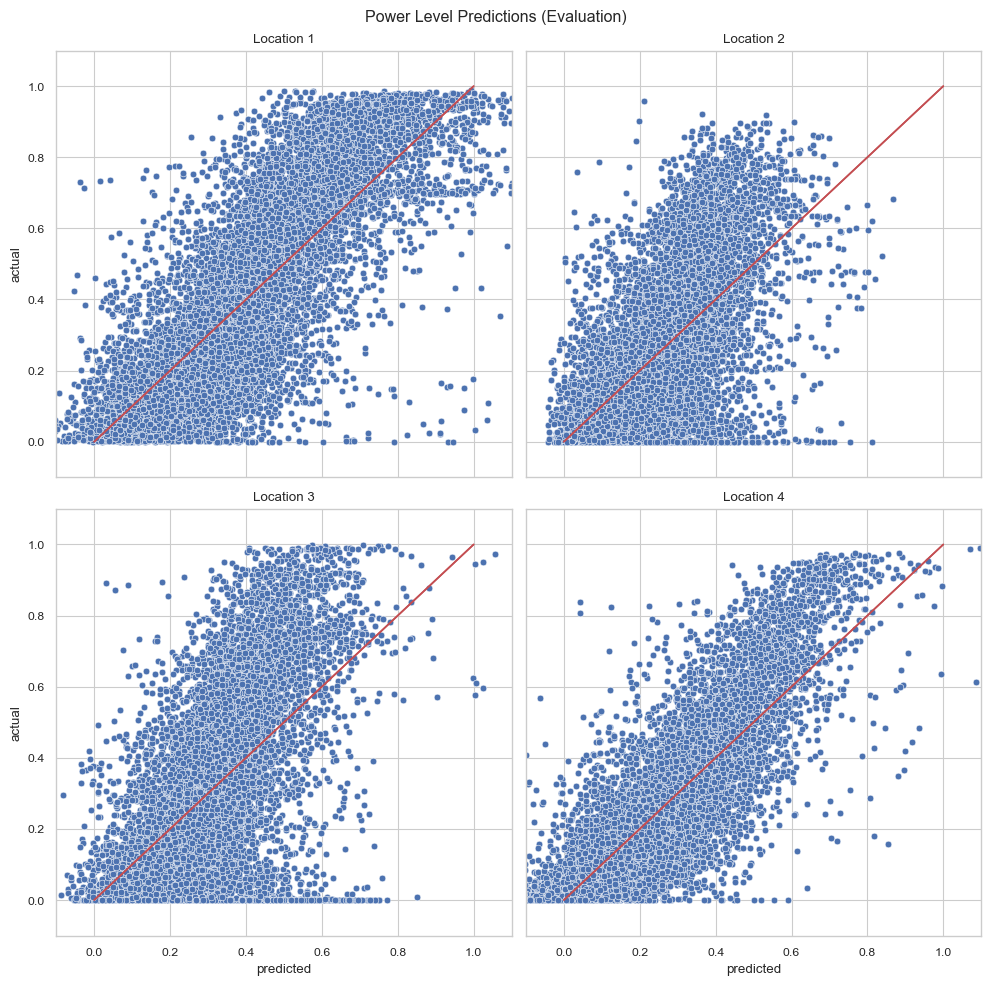

In [9]:
# visualize predictions
fig, _ = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(10,10)
for idx, (y_t, y_p) in enumerate(zip(y_true, y_pred)):
    plt.subplot(2, 2, idx+1)
    data = pd.DataFrame({
        'actual': y_t,
        'predicted': y_p
    })
    sns.scatterplot(data, x='predicted', y='actual')
    plt.plot([[0,0], [1,1]], color='r')
    plt.title(f'Location {idx+1}')
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.suptitle('Power Level Predictions (Evaluation)')
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------

To the [Support Vector Machine+ Notebook](./logistic-regression-ramp_exploit.ipynb)

Back to the [ML Notebook](./ml.ipynb)

Back to the [README](./README.md)